#### Table of Contents
- 1.0 Introduction
  - 1.1 Importing Modules & Dataset
  - 1.2 Column Overview (From Kaggle)
  - 1.3 Data Cleaning
  - 1.4 Added Columns
---
- 2.0 Country EDA
  - 2.1 Creating countrydf (Groupby Country)
  - 2.2 Country Visualizations
  - 2.3 Country-Subset Visualizations
  - 2.4 Country Takeaways & Conclusions
---
- 3.0 Category EDA
  - 3.1 Creating categorydf (Groupby Category)
  - 3.2 Category Visualizations
  - 3.3 Category Performance Differences
  - 3.4 Category Takeaways & Conclusions
---
- 4.0 Top 10 & Created Columns Analysis
  - 4.1 Creating Top 10 Subgroups
  - 4.2 Top 10 Subscribers vs. Top 10 Earners Visualization
  - 4.3 Earnings per Subscriber
  - 4.4 View Conversions & Uploads
  - 4.5 Links

---
- 5.0 Conclusions 

# 1.0 Introduction

Hello reader, my goal in this study is to analyze the variables that either contribute or correlate with a specific Youtuber around their success in 2023, specifically in their subscribers and earnings. The goal is to understand which variables are most influential on success for a Youtuber, in which at the same time we must figure out how to measure success.

The main variables I'll be analyzing are Category, Enrollment %, Country, Population, Uploads, and Video Views. I chose these because they can have varying degrees of impact depending on the type of viewer and for their purpose.

Although these there are many factors that can contribute to a Youtubers success that we may not understand yet, we will figure out how to measure success and look to predict future success with the information available.

HERE IS MY GITHUB FOR CODE: https://github.com/briangdrewes/youtuber-analysis 

### Data

I used a dataset from Kaggle: https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023

### 1.1 Importing Modules & Dataset

In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
pd.options.display.max_columns = None
import geopandas as gpd
import geoplot as gp
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.patches

In [6]:
rawdf = pd.read_csv('Global_YouTube_Statistics.csv',encoding ='latin-1')
rawdf.head(6)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,4057944.0,NaN,NaN,NaN,0.0,0.00,0.00,0.000000e+00,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2 Column Overview (From Kaggle)

**rank**: _Position of the YouTube channel based on the number of subscribers_ \
**Youtuber**: _Name of the YouTube channel_ \
**subscribers**: _Number of subscribers to the channel_ \
**video views**: _Total views across all videos on the channel_ \
**category**: _Category or niche of the channel_ \
**Title**: _Title of the YouTube channel_ \
**uploads**: _Total number of videos uploaded on the channel_ \
**Country**: _Country where the YouTube channel originates_ \
**Abbreviation**: _Abbreviation of the country_ \
**channel_type**: _Type of the YouTube channel (e.g., individual, brand)_ \
**video_views_rank**: _Ranking of the channel based on total video views_ \
**country_rank**: _Ranking of the channel based on the number of subscribers within its country_ \
**channel_type_rank**: _Ranking of the channel based on its type (individual or brand)_ \
**video_views_for_the_last_30_days**: _Total video views in the last 30 days_ \
**lowest_monthly_earnings**: _Lowest estimated monthly earnings from the channel_ \
**highest_monthly_earnings**: _Highest estimated monthly earnings from the channel_ \
**lowest_yearly_earnings**: _Lowest estimated yearly earnings from the channel_ \
**highest_yearly_earnings**: _Highest estimated yearly earnings from the channel_ \
**subscribers_for_last_30_days**: _Number of new subscribers gained in the last 30 days_ \
**created_year**: _Year when the YouTube channel was created_ \
**created_month**: _Month when the YouTube channel was created_ \
**created_date**: _Exact date of the YouTube channel's creation_ \
**Gross tertiary education enrollment (%)**: _Gross tertiary education enrollment (%): Percentage of the population enrolled in tertiary education in the country_ \
**Population**: _Total population of the country_ \
**Unemployment rate**: _Unemployment rate in the country_ \
**Urban_population**: _Percentage of the population living in urban areas_ \
**Latitude**: _Latitude coordinate of the country's location_ \
**Longitude**: _Longitude coordinate of the country's location_ 

### 1.3 Data Cleaning

From playing around in the dataset, I saw that there were certain Youtuber's that were errors, you can see here as 'Music' at rank 6 is not a Youtuber, but possibly just a bug in reading a category of music.

To single these out, I searched for video views less than 1, and it is pretty clear that these are errors since they have large amounts of subscribers with no earnings estimates or video views, with many NaN values

In [12]:
rawdf[rawdf['video views'] < 1]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
1,2,YouTube Movies,170000000,0.0,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,12.0,0.0,0.05,0.04,0.58,NaN,2006.0,Mar,5.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891
5,6,Music,119000000,0.0,NaN,Music,0,NaN,NaN,Music,4057944.0,NaN,NaN,NaN,0.0,0.00,0.00,0.00,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
12,13,Gaming,93600000,0.0,NaN,Gaming,0,NaN,NaN,Games,4057944.0,NaN,1.0,NaN,0.0,0.00,0.00,0.00,NaN,2013.0,Dec,15.0,NaN,NaN,NaN,NaN,NaN,NaN
18,19,Sports,75000000,0.0,NaN,sports,3,United States,US,Entertainment,3898122.0,6266.0,5395.0,16.0,0.0,0.06,0.05,0.77,NaN,2006.0,Jan,30.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891
102,103,News,36300000,0.0,NaN,News,0,NaN,NaN,NaN,4057944.0,NaN,NaN,NaN,0.0,0.00,0.00,0.00,NaN,2013.0,Sep,9.0,NaN,NaN,NaN,NaN,NaN,NaN
173,174,Popular on YouTube,29300000,0.0,NaN,Popular on Youtube,3,NaN,NaN,Education,4019724.0,NaN,4847.0,1.0,0.0,0.00,0.00,0.05,NaN,2017.0,Aug,7.0,NaN,NaN,NaN,NaN,NaN,NaN
360,361,Minecraft - Topic,20900000,0.0,NaN,Minecraft - Topic,0,NaN,NaN,Games,4057944.0,NaN,24.0,NaN,0.0,0.00,0.00,0.00,300000.0,2013.0,Dec,20.0,NaN,NaN,NaN,NaN,NaN,NaN
592,593,Live,16100000,0.0,NaN,Live,0,NaN,NaN,NaN,4057944.0,NaN,NaN,NaN,0.0,0.00,0.00,0.00,NaN,2015.0,Jan,13.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df = rawdf.drop(rawdf[rawdf['video views'] < 1].index)

After further exploration, we can see that channel_type and category are different.

In [18]:
df.category.unique()

array(['Music', 'Entertainment', 'Education', 'Shows', 'People & Blogs',
       'Gaming', 'Sports', 'Film & Animation', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       nan, 'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

In [19]:
df.channel_type.unique()

array(['Music', 'Entertainment', 'Education', 'People', 'Sports', 'Film',
       'News', nan, 'Games', 'Comedy', 'Howto', 'Nonprofit', 'Autos',
       'Tech', 'Animals'], dtype=object)

In order to remove the NaN values, and get accurate depiction of the category/channel type, I researched what the category types are for YouTube, and it was convenient that category was close to fully accurate, with only a few NaN values which I was able to take over from channel_type where missing. Alongside that, I had to do a few individual corrections. I also spot checked randomly to see if channels were lining up.

In [20]:
#created a function to take in an incorrect string from channel_type and replace with the correct style for category, for those NaN values.

def cat_cleaner(string):
    if string == 'Animals': 
        return 'Pets & Animals'
    elif string == 'Autos': 
        return 'Autos & Vehicles'
    elif string == 'Film': 
        return 'Film & Animation'
    elif string == 'Games': 
        return 'Gaming'
    elif string == 'Howto': 
        return 'Howto & Style'
    elif string == 'News': 
        return 'News & Politics'
    elif string == 'Nonprofit': 
        return 'Nonprofits & Activism'
    elif string == 'People': 
        return 'People & Blogs'
    elif string == 'Tech': 
        return 'Science & Technology'
    else:
        return string 

In [21]:
for index, row in df.iterrows():
    if df.category.isnull()[index]:
        df.category[index] = cat_cleaner(df.channel_type[index])

In [22]:
#adjusting a few specific cases I saw in the top few records
df[df.Youtuber == 'Busy Fun Ltd']['category'].index
df.at[445, 'category'] = 'Comedy'
df[df.Youtuber == 'KL BRO Biju Rithvik'].Country.index
df.at[302, 'Country'] = 'India'
df[df.Youtuber == 'BeatboxJCOP'].Country.index
df.at[483, 'Country'] = 'South Korea'

### 1.4 Added Columns

I will add a couple columns to the dataframe that I thought would be interesting to analyze later in the project.

**youtuber_count**: _Each youtuber is assigned a 1, this is used for aggregate groupby objects to record the amount of youtubers_ \
**earnings_per_sub**: _Highest Yearly Earnings divided by subscribers, a metric to how much a youtuber is estimated to make with the addition of 1 subscriber_ \
**links**: _The amount of links in the youtuber about page, I manually went on the pages of the top 10 youtubers to do a small analysis_ \
**overall_view_conversion**: _Subscribers divided by the amount of video views, looking to show how many video views it takes to convert 1 subscriber_ \
**last_30day_view_conversion**: _View conversion for the last 30 days_


In [26]:
# adding Youtuber Count to analyze how many Youtubers in certain categories or countries
df['x'] = 1
df = df.rename({'x':'youtuber_count'},axis=1)

In [28]:
#seeing how much a youtuber is estimated to make per subscriber
df['earnings_per_sub'] = df.loc[:,'highest_yearly_earnings'] /df.loc[:,'subscribers'] 

In [27]:
#adding links to top 10 youtubers to see what impact a youtuber receives when adding n amount of links in their about page
#df['links'] = 0 #adding a new column 'links' and setting to 0, for this project I will manually add the links but future works could be webscraped
df.at[df[df.Youtuber == 'T-Series'].links.index[0],'links'] = 5
df.at[df[df.Youtuber == "MrBeast"].links.index[0],'links'] = 2
df.at[df[df.Youtuber == "Cocomelon - Nursery Rhymes"].links.index[0],'links'] = 6
df.at[df[df.Youtuber == "SET India"].links.index[0],'links'] = 5
df.at[df[df.Youtuber == "ýýý Kids Diana Show"].links.index[0],'links'] = 8
df.at[df[df.Youtuber == "PewDiePie"].links.index[0],'links'] = 2
df.at[df[df.Youtuber == "Like Nastya"].links.index[0],'links'] = 5
df.at[df[df.Youtuber == "Vlad and Niki"].links.index[0],'links'] = 2
df.at[df[df.Youtuber == "Zee Music Company"].links.index[0],'links'] = 4
df.at[df[df.Youtuber == "WWE"].links.index[0],'links'] = 6
df.at[df[df.Youtuber == "Zee TV"].links.index[0],'links'] = 2
df.at[df[df.Youtuber =="StarPlus"].links.index[0],'links'] = 4
df.at[df[df.Youtuber =="Sony SAB"].links.index[0],'links'] = 5
df.at[df[df.Youtuber =="GR6 EXPLODE"].links.index[0],'links'] = 1
df.at[df[df.Youtuber =="ýýýýýýýýý KIMPRO"].links.index[0],'links'] = 1
df.at[df[df.Youtuber =="DaFuq!?Boom!"].links.index[0],'links'] = 3
df.at[df[df.Youtuber =="ViralHog"].links.index[0],'links'] = 7
df.at[df[df.Youtuber =="KL BRO Biju Rithvik"].links.index[0],'links'] = 0
df.at[df[df.Youtuber =="GH'S"].links.index[0],'links'] = 4
df.at[df[df.Youtuber =="Filaretiki"].links.index[0],'links'] = 3
df.at[df[df.Youtuber =="BeatboxJCOP"].links.index[0],'links'] = 3


In [30]:
#adding view conversions to see how many views it takes to convert to subscribers
df['overall_view_conversion'] = df.loc[:,'subscribers'] /df.loc[:,'video views'] 
df['last_30day_view_conversion'] = df.loc[:,'subscribers_for_last_30_days'] /df.loc[:,'video_views_for_the_last_30_days'] 

# 2.0 Country EDA

Country was one of the variables that first caught my attention. I know YouTube is big in the US, but it will be interesting to see what other countries have a significant YouTube presence. It will also be interesting to see how successful creators are depending on their country or if opportunity is available everywhere to be a YouTube creator. YouTube has its own factors that personalize content for viewers, and country is sure to have some part in that. Let's see what the data says.

### 2.1 Creating countrydf (Groupby Country)

In [36]:
countrydf = df.groupby('Country').sum().sort_values('subscribers',ascending=False)
countrydf['sizer'] = 1 #added this to help with sizing in plotly express scatterplots
countrydf.head()

/var/folders/bf/8_s8z7kn3l979_b34wzrg6yr0000gn/T/ipykernel_54286/3839819257.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,links,youtuber_count,earnings_per_sub,overall_view_conversion,last_30day_view_conversion,sizer
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,
United States,150984,7084500000,3.690292e+12,1299605,68829154.0,153348.0,126564.0,5.362141e+10,11351605.11,1.816076e+08,1.360415e+08,2.179397e+09,68915203.0,623631.0,4623.0,27430.2,1.020825e+11,4571.70,8.417620e+10,11535.064640,-29766.709101,37,311,96.851000,8808.979858,1.789411,1
India,83531,4333400000,2.299037e+12,3730053,17644342.0,37002.0,22688.0,3.974132e+10,9840719.25,1.572862e+08,1.179759e+08,1.889354e+09,59740000.0,340309.0,2711.0,4720.8,2.295582e+11,900.48,7.913330e+10,3459.738912,13265.763840,25,169,69.903893,1.308250,0.397329,1
Brazil,36187,1221800000,4.812090e+11,168178,4293900.0,6961.0,9950.0,1.383949e+10,1811314.00,2.884909e+07,2.177564e+07,3.478070e+08,7200000.0,122765.0,1010.0,3180.6,1.317868e+10,748.96,1.136098e+10,-882.570248,-3219.367360,1,62,16.656028,0.327876,0.058896,1
United Kingdom,22111,917400000,4.305665e+11,86816,10830787.0,12581.0,19156.0,3.664467e+09,916087.48,1.464408e+07,1.100671e+07,1.759100e+08,4801130.0,86454.0,712.0,2580.0,2.873879e+09,165.55,2.404058e+09,2381.256193,-147.746839,0,43,9.207987,0.122947,0.144399,1
Mexico,18527,626900000,1.982199e+11,33410,15009450.0,17159.0,23770.0,1.860700e+09,449684.00,7.218781e+06,5.388860e+06,8.625057e+07,3000000.0,66457.0,512.0,1326.6,4.158463e+09,112.86,3.386686e+09,779.938533,-3384.241872,0,33,5.277333,0.153290,0.082467,1


Just a quick look we can see that the US and India have a massive amount of subscribers and highest yearly earnings as compared to the next few.

### 2.2 Country Visualizations

I wanted to see the overall trend of countries in respect to subscribers and highest yearly earnings visibily, as viewing in a dataframe can be difficult.

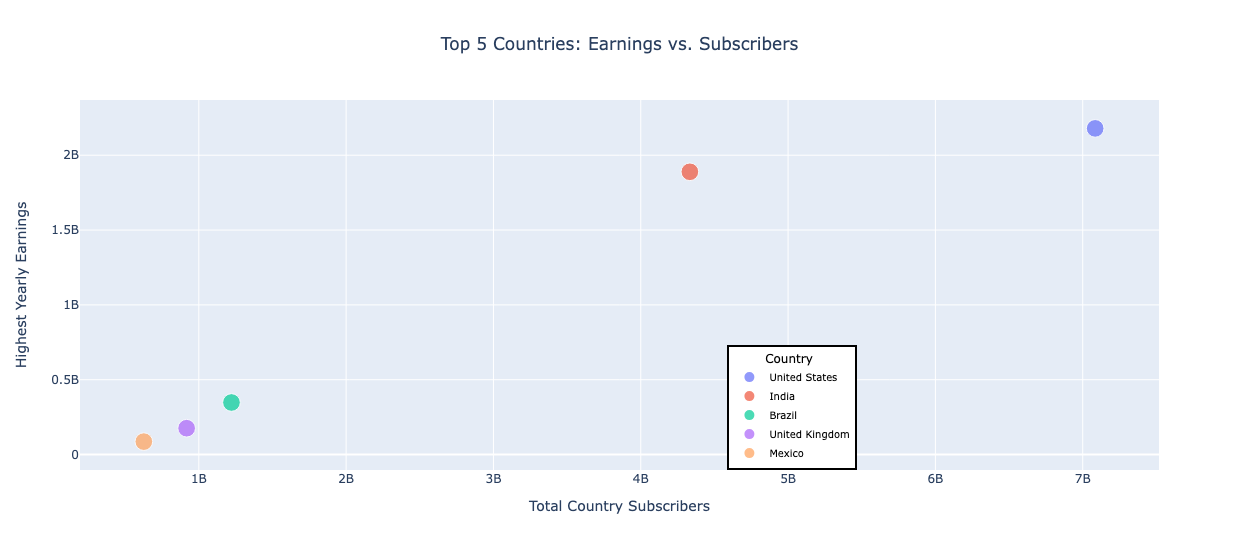

In [109]:
px.scatter(countrydf.head(5), 
           x='subscribers',y='highest_yearly_earnings', size = 'sizer', size_max=12.5,
               
               color=countrydf.head(5).index,
                labels = {'subscribers': 'Total Country Subscribers',
                          'highest_yearly_earnings': 'Highest Yearly Earnings'},
                     title ='Top 5 Countries: Earnings vs. Subscribers' ).update_layout(title_x=0.5,
                                                                                autosize=False, height=550, width=500).update_layout(
        legend_title="        Country", legend=dict(
        x=.6,
        y=0,
        #title_font_family="Sans Serif",
        font=dict(
            #family="Sans Serif",
            size=10,
            color="black"
        ),
        bgcolor="White",
        bordercolor="Black",
        borderwidth=2
    ))

In [40]:
countrydf.youtuber_count.head(5)

Country
United States     311
India             169
Brazil             62
United Kingdom     43
Mexico             33
Name: youtuber_count, dtype: int64

Here we can see that the more subscribers a country has, the more earnings their YouTubers make in total. With this small pull of 5 countries we can see a general trend that the more YouTubers in a country also shows success in subscribers and earnings. I only took the top five to not overcrowd our visual, and to give a good introduction to country. Below we will get into a more worldy approach of the countries.

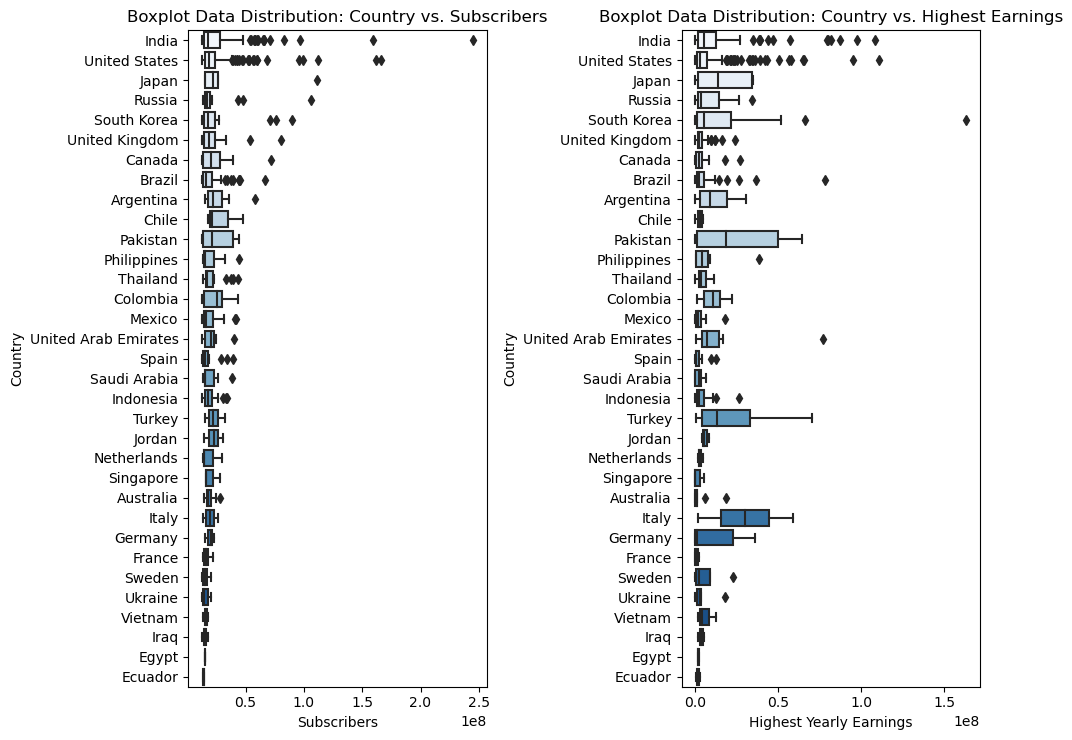

In [43]:
plt.figure(figsize=(10, 7.5))
gr1 = df.Country.value_counts() > 1
gr1 = gr1.where(gr1 == True).dropna()
#filtered out the singular youtubers countries
plt.subplot(1, 2, 1)
sns.boxplot(data=df[df.Country.isin(gr1.keys())], y='Country', x='subscribers',palette='Blues') #,showfliers=False)
plt.title('Boxplot Data Distribution: Country vs. Subscribers')
plt.ylabel('Country')
plt.xlabel('Subscribers')

plt.subplot(1, 2, 2)
sns.boxplot(data=df[df.Country.isin(gr1.keys())], y='Country', x='highest_yearly_earnings',palette='Blues')
plt.title('Boxplot Data Distribution: Country vs. Highest Earnings')
plt.ylabel('Country')
plt.xlabel('Highest Yearly Earnings')
plt.tight_layout()

plt.show()

From seeing the distribution of data through boxplots for each country (removing singular youtuber countries) there was some interesting data. India and US seem to be carried by mostly outliers. There were five countries here that specifically piqued my interest, and those are South Korea, Pakistan, Turkey, Italy, and Germany. The reason of interest was their drastically different distribution of earnings as compared to the distribution on the subscriberside. This led me to question are there more opportunities for certain countries?

In [50]:
subset_countriesdf = df.iloc[:,[2,3,13,17,18,7]] #taking only the columns I am looking to analyze.
subset_countriesdf['Country'] = np.where(df['Country'].isin(['South Korea', 'Italy', 'Germany', 'Turkey','Pakistan']) , 'Subset Countries', 'All Countries') #the subset of the countries mentioned earlier

Text(0.5, 1.0, 'Mean Earnings, All Countries vs. Subset')

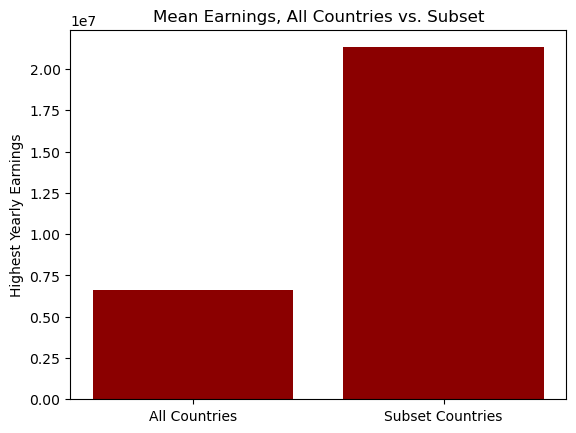

In [51]:
subset_countriesdf_grouped = subset_countriesdf.groupby('Country',as_index=False).mean()
plt.bar(subset_countriesdf_grouped.Country, subset_countriesdf_grouped.highest_yearly_earnings , color = 'darkred' )
plt.ylabel('Highest Yearly Earnings')
plt.title('Mean Earnings, All Countries vs. Subset')

This was an astounding point, the mean of highest earnings among the 5 subset countries were more than double that of the rest of the countries. \
I wanted to explore this further, therefore I created two separate correlation heatmaps to see the differences in the numeric variables among the subset and the full list of countries:

In [55]:
subset_countriesdf = df[df['Country'].isin(['South Korea', 'Italy', 'Germany', 'Turkey','Pakistan'])].select_dtypes(include=['number'])  #I had to retrieve only the data types of number for the correlation
not_subset_countriesdf = df[~df['Country'].isin(['South Korea', 'Italy', 'Germany', 'Turkey','Pakistan'])].select_dtypes(include=['number'])  
subset_countriesdf['subscribers_for_last_30_days'].fillna(subset_countriesdf['subscribers_for_last_30_days'].mean(), inplace=True) #I replaced the missing NaN values with the mean of the columns
not_subset_countriesdf['subscribers_for_last_30_days'].fillna(not_subset_countriesdf['subscribers_for_last_30_days'].mean(), inplace=True)
subset_countriesdf['video_views_for_the_last_30_days'].fillna(subset_countriesdf['video_views_for_the_last_30_days'].mean(), inplace=True)
not_subset_countriesdf['video_views_for_the_last_30_days'].fillna(not_subset_countriesdf['video_views_for_the_last_30_days'].mean(), inplace=True)
subset_countriesdf=subset_countriesdf[['subscribers','highest_yearly_earnings','video views', 'uploads', 'subscribers_for_last_30_days', 'video_views_for_the_last_30_days']]
not_subset_countriesdf=not_subset_countriesdf[['subscribers','highest_yearly_earnings','video views', 'uploads', 'subscribers_for_last_30_days', 'video_views_for_the_last_30_days']]

subset_countriesdf_heatmap = subset_countriesdf.corr()
not_subset_countriesdf_heatmap = not_subset_countriesdf.corr()

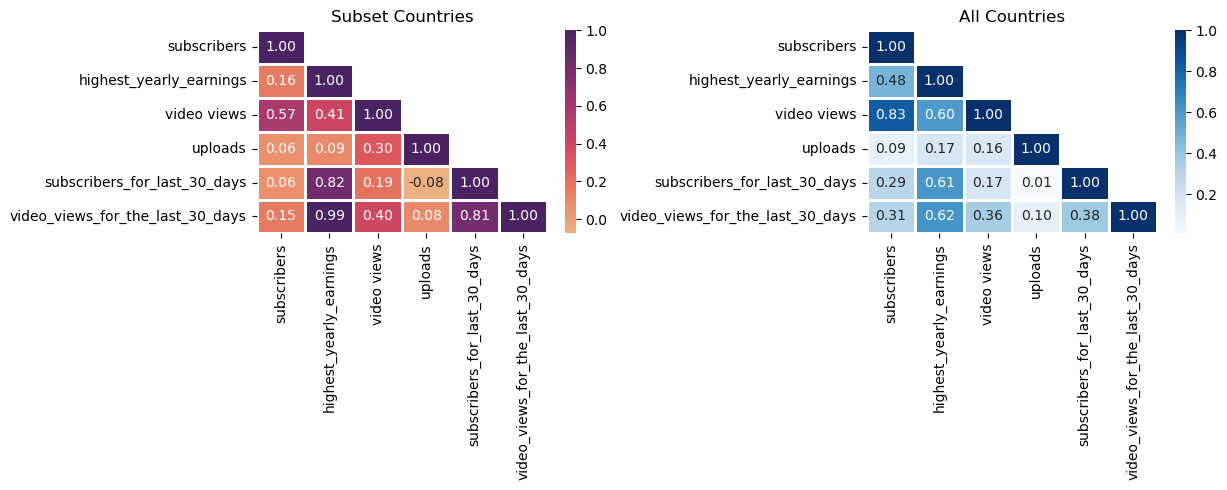

In [72]:

plt.figure(figsize=(12.5, 5))

plt.subplot(1, 2, 1)
matrix7 = np.triu(np.ones_like(subset_countriesdf_heatmap, dtype=bool))
np.fill_diagonal(matrix7,False)
sns.heatmap(subset_countriesdf_heatmap, annot=True, cmap='flare', fmt=".2f",linewidths=1,mask = matrix7)
plt.title('Subset Countries')
plt.subplot(1, 2, 2)
matrix8 = np.triu(np.ones_like(not_subset_countriesdf_heatmap, dtype=bool))
np.fill_diagonal(matrix8,False)
sns.heatmap(not_subset_countriesdf_heatmap, annot=True, cmap='Blues', fmt=".2f",linewidths=1,mask = matrix8)
plt.title('All Countries')


plt.tight_layout()

plt.show()

Extremely interesting takeaway from here, it shows us that some countries earnings are more correlated with last 30 day activity than the rest of the countries. Also, it seems that the countries that are seeing greater increases in earnings due to recent activity are seeing less subscribership overall \
This can lead to many questions.  \
_Does YouTube have algorithmic search that caters better to certain countries in a given month?  \
Could VPNs assist creators by virtually putting themselves into another country or registering as a certain nationality?  \
Are there nationalistic effects so great that it impacts creators for that country?  \
How long does it take for a country to adopt YouTube to the point where creators can be making hundreds of millions of dollars?_  


### 2.4 Country Takeaways and Conclusions

With a little alluding in the last section through questions, I wanted to put together a couple of takeways and conclusions about our exploration through the dataset in the lense of countries.
- You don't need to be the first, second or third most popular YouTuber country to be a successful creator. I used the word popular because there are so many different factors to think about that could define that word. Subscribership, earnings, video views, last 30 day metrics, there is no best way and there is A LOT of money being made in many countries.
- A data-driven approach to creating in a 'trending' country like the ones in our subset could pay off, however best to capitalize in the 30 day periods that earnings are correlated with.
    - VPNs can place virtual location in another country... may be misleading/distrustful
    - YouTube may have certain factors in their recommendations to users depending on IP address or country selected when the channel is created
- Old-fashioned nationalism may play a factor, Italians may be big YouTuber users and have a pride in their own kin, leading to great surge in views, subscribers, and earnings. More research required.

# 3.0 Category EDA

Now that we have got to take a look at how countries can have an impact on Youtuber strategy. I am curious to see if the same relationships apply to category, or is it just simple enough as more Youtubers means more subscribers means more earnings? Let's dive in and see what the data is saying about category.

### 3.1 Creating categorydf (Groupby Category)

In [115]:
categorydf = df.groupby('category').sum().sort_values('highest_yearly_earnings',ascending=False)
subcatdf = categorydf.sort_values('subscribers',ascending=False).head(5)
subcatdf['sizer']=1
categorydf.head()

/var/folders/bf/8_s8z7kn3l979_b34wzrg6yr0000gn/T/ipykernel_54286/4194160531.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,links,youtuber_count,earnings_per_sub,overall_view_conversion,last_30day_view_conversion
category,,,,,,,,,,,,,,,,,,,,,,,,,,
Entertainment,129955,5460700000,2.688926e+12,2877289,148634859.0,97777.0,207710.0,4.283032e+10,9807706.40,1.566510e+08,1.175347e+08,1.883135e+09,67241018.0,511353.0,4084.0,14073.3,1.003169e+11,2075.89,5.175820e+10,6031.372702,-1799.150286,10,255,81.493182,2.123288,3.103086
Music,90835,5209500000,3.126299e+12,472378,81242639.0,49434.0,124333.0,3.470169e+10,7024954.41,1.121615e+08,8.423797e+07,1.349135e+09,24711224.0,404123.0,3092.0,12153.2,7.100323e+10,1828.26,3.937452e+10,4906.721095,-5106.404486,10,203,50.698814,0.453613,1.236658
People & Blogs,78397,2974200000,1.359735e+12,1237587,102916317.0,47863.0,144657.0,2.492753e+10,6206200.36,9.932196e+07,7.449777e+07,1.191293e+09,43707515.0,288161.0,2291.0,7374.5,4.153699e+10,1003.38,2.338548e+10,3126.012652,-434.199408,24,144,61.718240,34.549747,2.567296
Comedy,36576,1407300000,5.578749e+11,77265,32063523.0,32636.0,22893.0,1.167457e+10,2888860.00,4.611354e+07,3.456668e+07,5.546650e+08,19800256.0,140934.0,1145.0,4102.1,3.225311e+10,636.02,1.607755e+10,1538.713476,-1259.137113,0,70,29.618518,0.296145,0.134493
Film & Animation,17595,1157400000,5.445838e+11,128844,32484026.0,22516.0,48994.0,9.253520e+09,2106114.01,3.370428e+07,2.517046e+07,4.046887e+08,18202965.0,92582.0,680.0,2103.8,2.093883e+10,348.74,1.009994e+10,733.677376,-609.186852,6,46,18.350205,0.229793,0.419698


From a quick glance, we can see that Entertainment, Music and People & Blogs are commanding the most earnings by far.

### 3.2 Category Visualizations

I wanted to see the overall trend of catagories in respect to subscribers and highest yearly earnings visibily like we did with countries, and as viewing in a dataframe can be difficult.

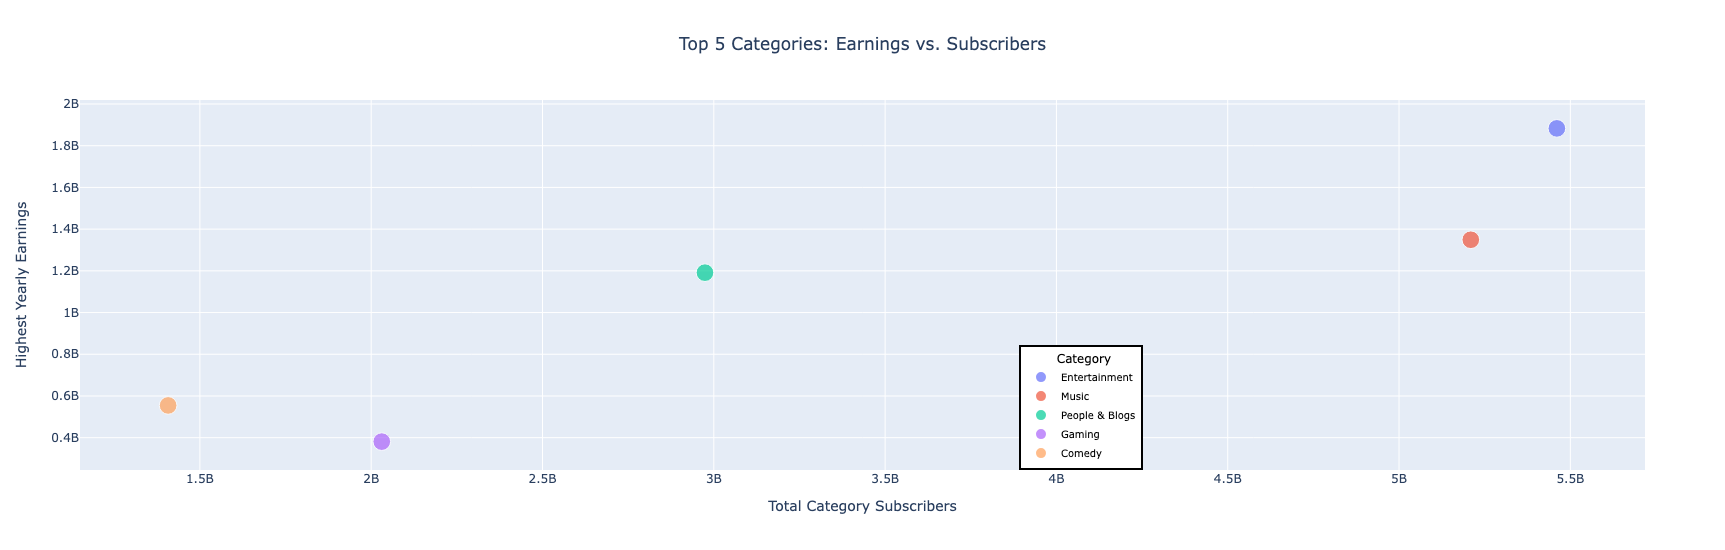

In [117]:
px.scatter(subcatdf, x='subscribers', y='highest_yearly_earnings', size = 'sizer', size_max = 12.5,color=subcatdf.index,#text=subcatdf.index,
           labels = {'subscribers': 'Total Category Subscribers',
                          'highest_yearly_earnings': 'Highest Yearly Earnings'},
                     title ='Top 5 Categories: Earnings vs. Subscribers').update_layout(
                                                                                autosize=False, height=550, width=600).update_traces(textposition='top left').update_layout(title_x=0.5,
                                                                                autosize=False, height=550, width=500).update_layout(
        legend_title="        Category", legend=dict(
        x=.6,
        y=0,
        font=dict(
        size=10,
        color="black"
        ),
        bgcolor="White",
        bordercolor="Black",
        borderwidth=2
    ))

In [120]:
subcatdf.youtuber_count

category
Entertainment     255
Music             203
People & Blogs    144
Gaming             98
Comedy             70
Name: youtuber_count, dtype: int64

Interesting takeaway, this goes against our previous findings where we were seeing more Youtubers meant more subscribers meant more earnings. Here we can see that Gaming has more subscribers and youtubers than Comedy, however Comedy has more earnings. This similarly to country, was a simple top 5 visualization to give an introduction to our variable. We will get into a more detailed approach below and hopefully solve the mystery of this change in correlation.

/var/folders/bf/8_s8z7kn3l979_b34wzrg6yr0000gn/T/ipykernel_54286/3039022330.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<function matplotlib.pyplot.show(close=None, block=None)>

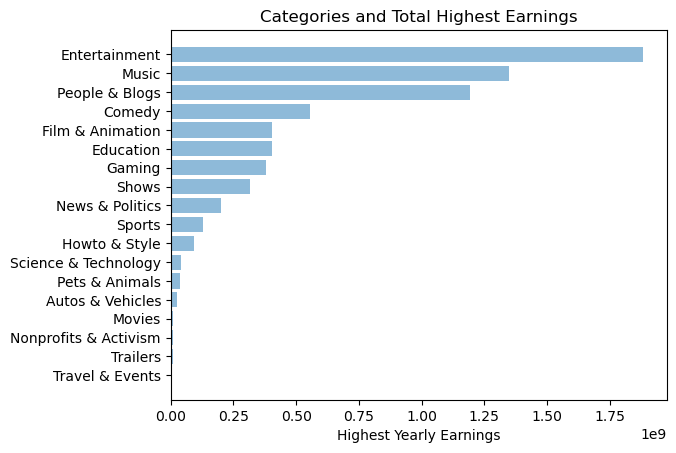

In [122]:
categorydf = df.groupby('category').sum().sort_values('highest_yearly_earnings',ascending=True)
plt.barh(categorydf.index, categorydf.highest_yearly_earnings,alpha=0.5)
plt.title('Categories and Total Highest Earnings')
plt.xlabel('Highest Yearly Earnings')
plt.show

In [124]:
categorydf['earning_percentage'] = categorydf.highest_yearly_earnings/(sum(categorydf.highest_yearly_earnings)) *100
categorydf['earning_percentage'].sort_values(ascending=False)

category
Entertainment            26.724761
Music                    19.146437
People & Blogs           16.906395
Comedy                    7.871603
Film & Animation          5.743194
Education                 5.740095
Gaming                    5.408822
Shows                     4.498748
News & Politics           2.844026
Sports                    1.827404
Howto & Style             1.340523
Science & Technology      0.598362
Pets & Animals            0.543544
Autos & Vehicles          0.373240
Movies                    0.154689
Nonprofits & Activism     0.133401
Trailers                  0.123467
Travel & Events           0.021287
Name: earning_percentage, dtype: float64

I calculated the percentage of total earnings for each category in the dataset above. Here we can see that the top three categories command an overall 63% of the total dataset. I showed this since it was a powerful bar chart showing the dramatic difference in the amount of money being made in those top 3. Another insight I found here, if we remember back to that first bar plot with the top 5 categories by subscribers, we had Gaming. On the percentage of earnings and the bar plot it is way lower than where it landed on the scatter plot compared to other countries. This is something that I wanted to explore further, especially since it is uncharacteristic on what we found with countries and the correlation between youtubers, subscribers and earnings.

### 3.3 Category Performance Differences

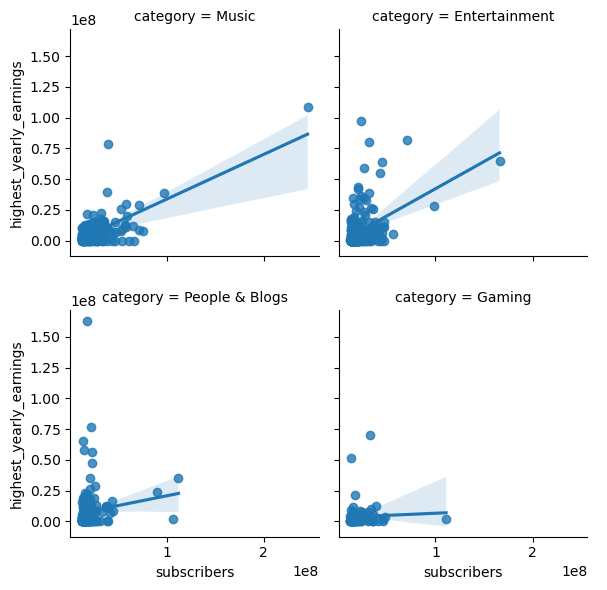

In [125]:
g = sns.FacetGrid(df[df['category'].isin(['Entertainment','Music','People & Blogs','Gaming'])], col='category', col_wrap=2)
g = g.map(sns.regplot,'subscribers','highest_yearly_earnings').add_legend()
g

From this point of view, we can see some categories perform better in terms of earnings. Our data here lets us believe that Entertainment creators are expected to make more earnings for each subscriber than those in Gaming. This could have a couple of reasons, one off the top of my head is that Gaming expands to younger crowds that may not be willing to spend on what creators offer, or just watch streams for free. Whereas Entertainment can be paid series or content that is catered to several different age groups, etc.

### 3.4 Category Takeaways and Conclusions

Some good points can be derived from this category analysis:
- The top three categories (Entertainment, Music, and People & Blogs) have a commanding amount of total earnings in the dataset, and thus possibly YouTube as a whole.
- The top three also had the most amount of Youtubers, however that does not implicate that is the best way to make earnings in reference to category.
- You can be more successful in some categories in earnings moreso than others. Entertainment vs. Gaming
- It's important to understand your channel and your audience. If you are passionate about creating for your niche go for it, there are still subscribers and earnings to be made.
- If you are looking to make earnings, it may be beneficial to create in a category with trends similar to Music and Entertainment rather than People & Blogs or Gaming.

# 4.0 Top 10 & Created Columns Analysis


As we are looking through these variables, I thought it would be beneficial to look at smaller groups to identify trends among the top performers. We look repetitively at subscribers and earnings, so I will be separating them to look at if these two groups are the same, or if they are vastly different in their top 10. It will be interesting to see how the data or trends factor into our findings. It's also just interesting to look at the top of the top, and to see if our Mr. Beast can compare with the top Youtubers.

### 4.1 Creating Top 10 Subgroups

In [127]:
top10_subscribership = df[['Youtuber','category','Country','subscribers','highest_yearly_earnings','video views', 'uploads', 'subscribers_for_last_30_days', 'video_views_for_the_last_30_days','earnings_per_sub','last_30day_view_conversion','overall_view_conversion','links']].sort_values(by=['subscribers'],ascending=False).head(10)
top10_earnings = df[['Youtuber','category','Country','subscribers','highest_yearly_earnings','video views', 'uploads', 'subscribers_for_last_30_days', 'video_views_for_the_last_30_days','earnings_per_sub','last_30day_view_conversion','overall_view_conversion','links']].sort_values(by=['highest_yearly_earnings'],ascending=False).head(10)
top10_subscribership.head()

,Youtuber,category,Country,subscribers,highest_yearly_earnings,video views,uploads,subscribers_for_last_30_days,video_views_for_the_last_30_days,earnings_per_sub,last_30day_view_conversion,overall_view_conversion,links
0,T-Series,Music,India,245000000,108400000.0,2.280000e+11,20082,2000000.0,2.258000e+09,0.442449,0.000886,0.001075,5
2,MrBeast,Entertainment,United States,166000000,64700000.0,2.836884e+10,741,8000000.0,1.348000e+09,0.389759,0.005935,0.005851,2
3,Cocomelon - Nursery Rhymes,Education,United States,162000000,94800000.0,1.640000e+11,966,1000000.0,1.975000e+09,0.585185,0.000506,0.000988,6
4,SET India,Shows,India,159000000,87500000.0,1.480000e+11,116536,1000000.0,1.824000e+09,0.550314,0.000548,0.001074,5
6,ýýý Kids Diana Show,People & Blogs,United States,112000000,35100000.0,9.324704e+10,1111,NaN,7.316740e+08,0.313393,NaN,0.001201,8


In [128]:
top10_earnings.head()

,Youtuber,category,Country,subscribers,highest_yearly_earnings,video views,uploads,subscribers_for_last_30_days,video_views_for_the_last_30_days,earnings_per_sub,last_30day_view_conversion,overall_view_conversion,links
495,ýýýýýýýýý KIMPRO,People & Blogs,South Korea,17700000,163400000.0,1.920670e+10,1646,3200000.0,3.404000e+09,9.231638,0.000940,0.000922,1
417,DaFuq!?Boom!,Film & Animation,United States,19600000,110600000.0,7.906182e+09,214,6700000.0,2.304000e+09,5.642857,0.002908,0.002479,3
0,T-Series,Music,India,245000000,108400000.0,2.280000e+11,20082,2000000.0,2.258000e+09,0.442449,0.000886,0.001075,5
302,KL BRO Biju Rithvik,Entertainment,India,22800000,97600000.0,1.798835e+10,1841,3200000.0,2.033000e+09,4.280702,0.001574,0.001267,0
3,Cocomelon - Nursery Rhymes,Education,United States,162000000,94800000.0,1.640000e+11,966,1000000.0,1.975000e+09,0.585185,0.000506,0.000988,6


We can see already that we have differences in YouTubers. Let's dive further into this to see how we can visualize this with what we already know.

### 4.2 Top 10 Subscribers vs. Top 10 Earners Visualization

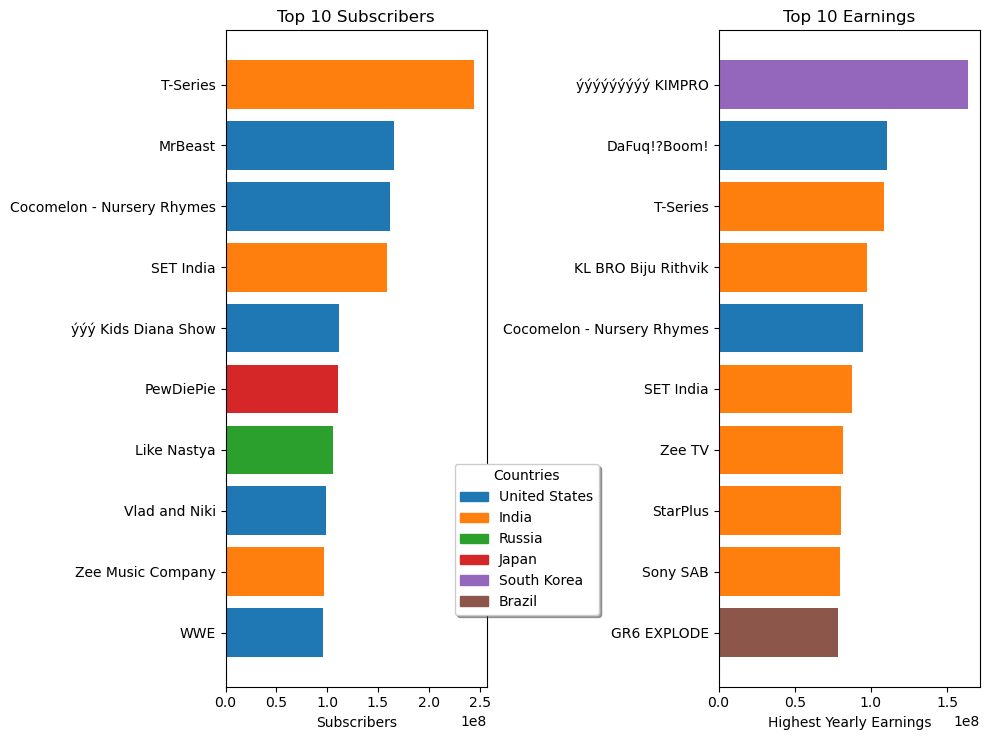

In [139]:
plt.figure(figsize=(10, 7.5))

#had to manually edit categories to have the same color accomodate both charts
#want to view the top 10 in subscribership and top 10 in earnings
chtop10_subscribership = top10_subscribership.sort_values(by=['subscribers'],ascending=True)
levels, categories = pd.factorize(chtop10_subscribership['Country'])
colors = [plt.cm.tab10(i) for i in levels]
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories2)]
levels2 = np.array([4,0,1,1,0,1,1,1,1,5])
levels2 = np.flip(levels2)
categories2 = categories
categories2 = np.append(categories2, 'South Korea')
categories2 = np.append(categories2, 'Brazil')

plt.subplot(1, 2, 1)
plt.barh(chtop10_subscribership.Youtuber,chtop10_subscribership.subscribers, color=colors)
plt.title('Top 10 Subscribers')
plt.xlabel('Subscribers')
plt.legend(handles=handles,title='Countries',loc='best', bbox_to_anchor=(.85,.35),fancybox=True, shadow=True)

chtop10_earnings = top10_earnings.sort_values(by=['highest_yearly_earnings'],ascending=True)
colors2 = [plt.cm.tab10(i) for i in levels2]
plt.subplot(1, 2, 2)
plt.barh(chtop10_earnings.Youtuber,chtop10_earnings.highest_yearly_earnings, color=colors2)
plt.title('Top 10 Earnings')
plt.xlabel('Highest Yearly Earnings')
plt.tight_layout()

plt.show()

I put the top 10 earnings and top 10 subscribers side by side as bar plots. This also came with interesting but also reassuring findings. US & India make up 80% of both charts, and we have the individual countries that we wouldn't have thought we would see, which assists in our analysis before with country. Also to note, there are only 3 youtubers that both charts share, the rest are unique to the separate chart. I wanted to further explore how we could find a way to combine these into a common metric.

### 4.3 Earnings per Subscriber

In [141]:
df['earnings_per_sub'] = df.loc[:,'highest_yearly_earnings'] /df.loc[:,'subscribers'] 
top10_eps_conv = df[['Youtuber','earnings_per_sub','last_30day_view_conversion','overall_view_conversion','category','Country', 'uploads']].sort_values(by=['earnings_per_sub'],ascending=False).head(10)
top10_eps_conv

,Youtuber,earnings_per_sub,last_30day_view_conversion,overall_view_conversion,category,Country,uploads
495,ýýýýýýýýý KIMPRO,9.231638,0.000940,0.000922,People & Blogs,South Korea,1646
417,DaFuq!?Boom!,5.642857,0.002908,0.002479,Film & Animation,United States,214
798,ViralHog,4.678571,0.000806,0.000740,People & Blogs,United States,41117
302,KL BRO Biju Rithvik,4.280702,0.001574,0.001267,Entertainment,India,1841
905,GH'S,3.992308,0.000925,0.001488,Gaming,South Korea,510
712,Filaretiki,3.905405,0.001413,0.000937,People & Blogs,United States,2222
483,BeatboxJCOP,3.666667,0.002473,0.002065,Film & Animation,South Korea,748
332,ZAMZAM ELECTRONICS TRADING,3.534562,0.002128,0.002551,People & Blogs,United Arab Emirates,15126
970,_vector_,3.500000,0.001328,0.001632,Comedy,United States,398
388,dednahype,2.960396,0.000964,0.000966,Comedy,Latvia,1935


([<matplotlib.axis.YTick at 0x28fc64790>,
 [Text(0, 10, 'ýýýýýýýýý KIMPRO'),
  Text(0, 9, 'DaFuq!?Boom!'),
  Text(0, 8, 'ViralHog'),
  Text(0, 7, 'KL BRO Biju Rithvik'),
  Text(0, 6, "GH'S"),
  Text(0, 5, 'Filaretiki'),
  Text(0, 4, 'BeatboxJCOP'),
  Text(0, 3, 'ZAMZAM ELECTRONICS TRADING'),
  Text(0, 2, '_vector_'),
  Text(0, 1, 'dednahype')])

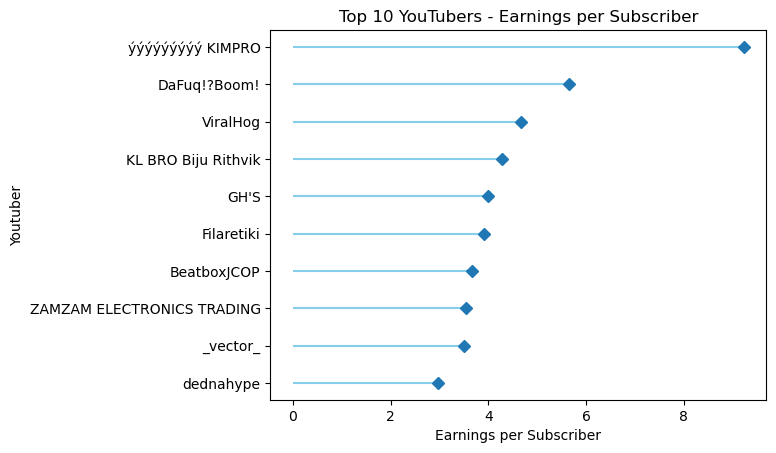

In [143]:
my_range = range(len(top10_eps_conv['Youtuber']),0,-1)
#plt.stem(top10_eps_conv['earnings_per_sub'])
plt.hlines(y=my_range, xmin=0, xmax=top10_eps_conv['earnings_per_sub'], color='skyblue')
plt.plot(top10_eps_conv['earnings_per_sub'], my_range, 'D')
plt.title('Top 10 YouTubers - Earnings per Subscriber')
plt.ylabel('Youtuber')
plt.xlabel('Earnings per Subscriber')
plt.yticks(my_range,top10_eps_conv['Youtuber'])

Interesting enough, the top 2 from earnings are also the top 2 in Earnings per Subscriber. We also see a bunch of new players here, showing there are various ways to show top performance, and this variable incorporates both subscribership and earnings. I also find it as a good benchmark to evaluate yourself as a Youtuber, if your EPS (earnings_per_sub) is low, is it because your subscribers are too high? or your earnings are too low? (compared to the other) \
\
This can also bring about a quality perspective, if you have a high earnings per subscriber and a large amount of subscribers. You are outputting quality content to a large valuable crowd. \

### 4.4 View Conversions & Uploads

In [140]:
df['overall_view_conversion'] = df.loc[:,'subscribers'] /df.loc[:,'video views'] 
df['last_30day_view_conversion'] = df.loc[:,'subscribers_for_last_30_days'] /df.loc[:,'video_views_for_the_last_30_days'] 


As seen in the previous chart, I included view conversion. I attempted to find a variable that we can gauge video views with subscribers to see how many views it takes to convert 1 subscriber.

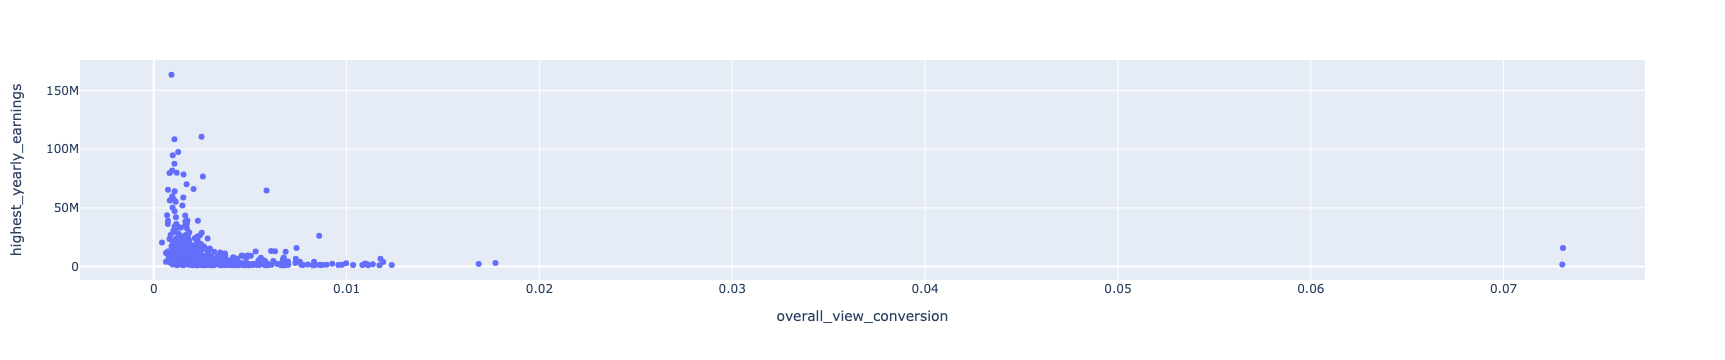

In [144]:
px.scatter(df[df['highest_yearly_earnings']>1000000], x='overall_view_conversion', y='highest_yearly_earnings')

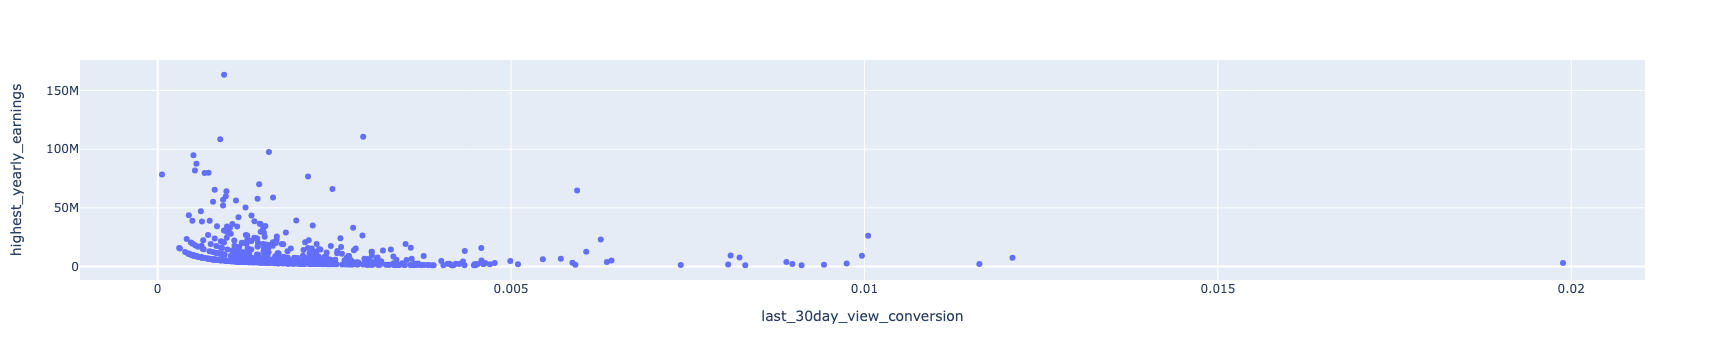

In [145]:
px.scatter(df[df['highest_yearly_earnings']>1000000], x='last_30day_view_conversion', y='highest_yearly_earnings')

I didn't find any interesting trends or insights out of this. Potentially with more research or addition of more variables this could prove fruitful.

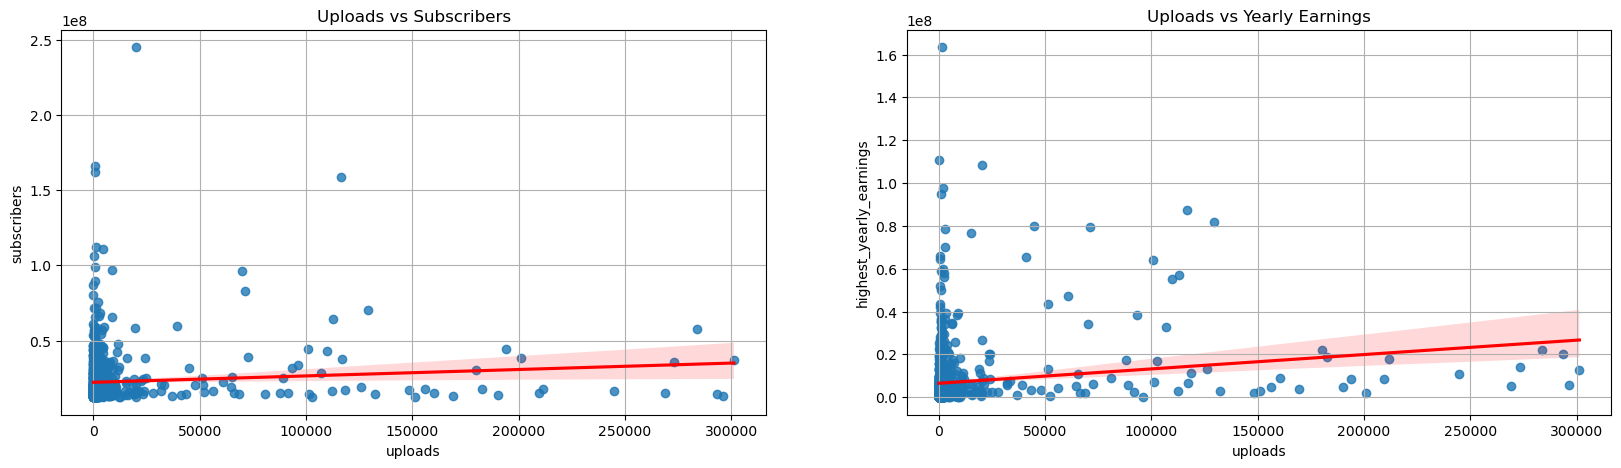

In [147]:
fig8, axs = plt.subplots(1, 2, figsize=(20,5))

sns.regplot(ax=axs[0], data=df, x='uploads', y='subscribers', line_kws={'color': 'red'})
sns.regplot(ax=axs[1], data=df, x='uploads', y='highest_yearly_earnings', line_kws={'color': 'red'})

axs[0].grid(True)
axs[0].set_title('Uploads vs Subscribers')
axs[1].grid(True)
axs[1].set_title('Uploads vs Yearly Earnings')

plt.show()

I wanted to see the impact of Uploads, and I thought it would've had more impact on success. From what I had available, it looked as if Upload didn't have any major correlation to success or variables that contribute to success. If we were just going off this data, more Uploads would not have a great impact on earnings or subscribers. Interesting point though, more research required.

### 4.5 Links

Links is a custom variable that I created completely. Since I had to manually grab the data from each Youtuber, I limited it to the top 10 earnings Youtubers. I went onto each About section of the Youtuber's channel and I counted the amount of links that were available and added it to the end of their record in the dataframe as a quantitative 'links' columns. Let's see if there was any impact.

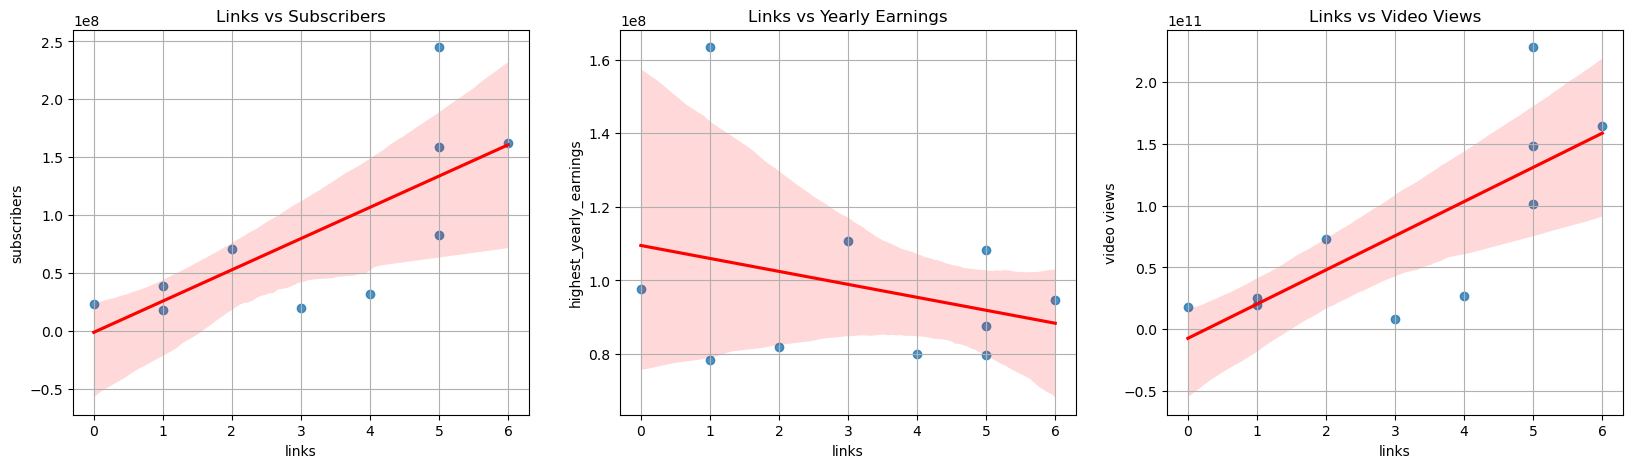

In [149]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))

sns.regplot(ax=axs[0], data=top10_earnings, x='links', y='subscribers', line_kws={'color': 'red'})
sns.regplot(ax=axs[1], data=top10_earnings, x='links', y='highest_yearly_earnings', line_kws={'color': 'red'})
sns.regplot(ax=axs[2], data=top10_earnings, x='links', y='video views', line_kws={'color': 'red'})

axs[0].grid(True)
axs[0].set_title('Links vs Subscribers')
axs[1].grid(True)
axs[1].set_title('Links vs Yearly Earnings')
axs[2].grid(True)
axs[2].set_title('Links vs Video Views')
plt.show()

This was interesting enough that the more links a Youtuber had, the more subscribers and video views they generated, whereas it also had a slight negative correlation on earnings. This could be a factor in cross consumption of their other media accounts, pointing to other videos of theirs, or storefronts. This could be a beneficial point to bring up when looking to increase subscribers or video views.

# 5.0 Conclusions

So can I make a zillion dollars like MrBeast now? Not necessarily... but

- Upload amount has a small effect on earnings and subscribers.
- Varying earnings per subscriber in categories
- Country’s can have varying correlations (30 day activity)
- The most Youtubers, subscribers and earnings are found in US and India.
- Adding Links to your profile can help bolster your subscribers and video views.
- If your earnings per subscriber is low, evaluate which and why.


Other Considerations - there could be many reasons my analysis is misleading or wrong. Some to note:
- Nonprofits & Activism was a category, is there success through subscribers and earnings or generating awareness for their causes?
- Links, consider the idea of this one, if there are multiple businesses attached to this Youtuber's channel, how can we be certain these variables are the impact and not the other avenues?
- Many more possibilities in this manner to think about.

BUT! This is a start, a place to start one's journey into evaluating success as a Youtuber. The point to grab here is that you can empower your creator voyage with data.

### Future Works

- MORE DATA!
  - Very interested to see how other variables would play a part, after looking at the other Youtube posts, I saw some had video length, days trending per video, video titles, etc.
  - I felt a bit limited, instead of top 1000, would love to see top 10k… 100k… 1 mil… 
- Dive further into this viral thought
  - South Korea had a burst of recent activity driving earnings… how do we figure out when that happens and why?
- Time data
  - Look into time series to track trend and youtubers over time rather than a specific point in time
- Consultative ideas
  - Track conversions per video, earnings per video, etc.. what are the top videos doing?
- Research into Youtube Ads
  - How are Ads playing into this? What is Youtube’s algorithm doing to help/hamper creators?
- Multi-platform analysis
  - What impact does Tik-Tok, Instagram, Snapchat, Twitter, etc. have on their Youtube channel
